## 🔗 Table of Contents <a id="🔗-table-of-contents"></a>

- [Midprices of all Products Round 3 2025](#midprices-of-all-products-round-3-2025)
- [Correlation Products 2025](#correlation-products-2025)
- [VOLCANIC products only](#volcanic-products-only)
- [Extra processing for volcanic products](#extra-processing-for-volcanic-products)
- [Plotting intrinsic values + mid prices Day 0, Day 1, Day 2](#plotting-intrinsic-values-+-mid-prices-day-0,-day-1,-day-2)
- [Plotting Premiums Day 0, Day 1, Day 2](#plotting-premiums-day-0,-day-1,-day-2)
- [Z-Scores Day 0, Day 1, Day 2](#z-scores-day-0,-day-1,-day-2)
- [Correlations 2023 (round4), 2025](#correlations-2023-(round4),-2025)
- [Correlations 2024 (round3), 2025](#correlations-2024-(round3),-2025)

### Helper functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_product_mid_prices(csv_file_path: str, ignore_old: bool = True):
    try:
        df = pd.read_csv(csv_file_path, delimiter=';')

        # Convert relevant cols to numeric
        df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
        df['mid_price'] = pd.to_numeric(df['mid_price'], errors='coerce')

        # Drop rows where data is missing after conversion, if any
        df.dropna(subset=['timestamp', 'mid_price', 'product'], inplace=True)

        # Get all unique product
        all_products = df['product'].unique()

        # Products to ignore
        products_to_ignore = {"KELP", "RAINFOREST_RESIN", "SQUID_INK"} 

        # Filter the product list based on the ignore_old flag
        if ignore_old:
            products_to_plot = [p for p in all_products if p not in products_to_ignore]
        else:
            products_to_plot = list(all_products) # Plot all products

        num_products_to_plot = len(products_to_plot)

        # Check if there are any products left to plot
        if num_products_to_plot == 0:
            print("No products to plot")
            return

        # Create the figure and the exact number of subplots required
        fig, axes = plt.subplots(nrows=num_products_to_plot, ncols=1, sharex=True,
                                 figsize=(12, 4 * num_products_to_plot), squeeze=False)
        axes = axes.flatten()

        # Iterate through products 
        for i, product in enumerate(products_to_plot):
            ax = axes[i] # Select the correct subplot axis

            # Filter the DataFrame for the current product's data
            product_df = df[df['product'] == product].sort_values('timestamp')

            # Plot mid_price vs timestamp for this product
            ax.plot(product_df['timestamp'], product_df['mid_price'], label=product)

            # Set the title and y-axis label for this subplot
            ax.set_title(f'{product} Mid Price')
            ax.set_ylabel('Mid Price')
            ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
            ax.grid(True, linestyle='--', alpha=0.6)
            
             
        # Set the x-axis label only on the bottom-most subplot
        axes[-1].set_xlabel('Timestamp')
        plt.tight_layout() 
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' was not found.")

def plot_volcanic_products(csv_path):
    df = pd.read_csv(csv_path, sep=";")

    volcanic_products = [
        'VOLCANIC_ROCK',
        'VOLCANIC_ROCK_VOUCHER_9500',
        'VOLCANIC_ROCK_VOUCHER_9750',
        'VOLCANIC_ROCK_VOUCHER_10000',
        'VOLCANIC_ROCK_VOUCHER_10250',
        'VOLCANIC_ROCK_VOUCHER_10500',
    ]

    # Filter only volcanic products
    df_volcanic = df[df['product'].isin(volcanic_products)]

    # Create subplots
    num_products = len(volcanic_products)
    fig, axes = plt.subplots(num_products, 1, figsize=(12, 3 * num_products), sharex=True)

    for i, product in enumerate(volcanic_products):
        product_df = df_volcanic[df_volcanic['product'] == product]
        axes[i].plot(product_df['timestamp'], product_df['mid_price'], label=product, color='orange')
        axes[i].set_ylabel("Mid Price")
        axes[i].set_title(f"Mid Price Time Series: {product}")
        axes[i].legend(loc="upper left")
        axes[i].grid(True)

    axes[-1].set_xlabel("Timestamp")
    plt.tight_layout()
    plt.show()

voucher_names = [
        "VOLCANIC_ROCK_VOUCHER_9500",
        "VOLCANIC_ROCK_VOUCHER_9750",
        "VOLCANIC_ROCK_VOUCHER_10000",
        "VOLCANIC_ROCK_VOUCHER_10250",
        "VOLCANIC_ROCK_VOUCHER_10500",
    ]

def plot_rock_and_intrinsic_values(df, voucher_names):
    fig, axes = plt.subplots(6, 1, figsize=(14, 18), sharex=True)

    # Plot VOLCANIC_ROCK mid_price
    rock_df = df[df["product"] == "VOLCANIC_ROCK"]
    axes[0].plot(rock_df["timestamp"], rock_df["mid_price"], label="VOLCANIC_ROCK", color="black")
    axes[0].set_title("Mid Price of VOLCANIC_ROCK")
    axes[0].set_ylabel("Mid Price")
    axes[0].legend()

    voucher_names = voucher_names

    for i, voucher in enumerate(voucher_names):
        voucher_df = df[df["product"] == voucher]
        axes[i + 1].plot(voucher_df["timestamp"], voucher_df["intrinsic_value"], label="Intrinsic Value", linestyle='--')
        axes[i + 1].plot(voucher_df["timestamp"], voucher_df["mid_price"], label="Voucher Mid Price", alpha=0.8)
        axes[i + 1].set_title(f"{voucher}")
        axes[i + 1].set_ylabel("Price")
        axes[i + 1].legend()

    axes[-1].set_xlabel("Timestamp")
    plt.tight_layout()
    plt.show()

def plot_rock_and_premiums(df, voucher_names):
    fig, axes = plt.subplots(6, 1, figsize=(14, 18), sharex=True)

    # Plot VOLCANIC_ROCK mid_price
    rock_df = df[df["product"] == "VOLCANIC_ROCK"]
    axes[0].plot(rock_df["timestamp"], rock_df["mid_price"], label="VOLCANIC_ROCK", color="black")
    axes[0].set_title("Mid Price of VOLCANIC_ROCK")
    axes[0].set_ylabel("Mid Price")
    axes[0].legend()

    voucher_names = voucher_names

    for i, voucher in enumerate(voucher_names):
        voucher_df = df[df["product"] == voucher]
        axes[i + 1].plot(voucher_df["timestamp"], voucher_df["premium"], label=f"Premium - {voucher}", color="purple")
        axes[i + 1].set_title(f"Premium of {voucher}")
        axes[i + 1].set_ylabel("Premium")
        axes[i + 1].legend()

    axes[-1].set_xlabel("Timestamp")
    plt.tight_layout()
    plt.show()

    import matplotlib.pyplot as plt

def plot_rock_and_zscores(df, voucher_names):
    fig, axes = plt.subplots(6, 1, figsize=(14, 18), sharex=True)

    # Plot VOLCANIC_ROCK mid_price
    rock_df = df[df["product"] == "VOLCANIC_ROCK"]
    axes[0].plot(rock_df["timestamp"], rock_df["mid_price"], label="VOLCANIC_ROCK", color="black")
    axes[0].set_title("Mid Price of VOLCANIC_ROCK")
    axes[0].set_ylabel("Mid Price")
    axes[0].legend()

    # Plot Z-scores of vouchers
    voucher_names = voucher_names

    for i, voucher in enumerate(voucher_names):
        voucher_df = df[df["product"] == voucher]
        axes[i + 1].plot(voucher_df["timestamp"], voucher_df["z_score"], label=f"Z-score - {voucher}", color="blue")
        axes[i + 1].axhline(0, color="gray", linestyle="--", linewidth=1)
        axes[i + 1].axhline(2, color="red", linestyle="--", linewidth=1, label="Sell Threshold (+2)")
        axes[i + 1].axhline(-2, color="green", linestyle="--", linewidth=1, label="Buy Threshold (-2)")
        axes[i + 1].set_title(f"Z-score of {voucher}")
        axes[i + 1].set_ylabel("Z-score")
        #axes[i + 1].legend()

    axes[-1].set_xlabel("Timestamp")
    plt.tight_layout()
    plt.show()

## Midprices of all Products Round 3 2025

### Data Round 3 Day 0

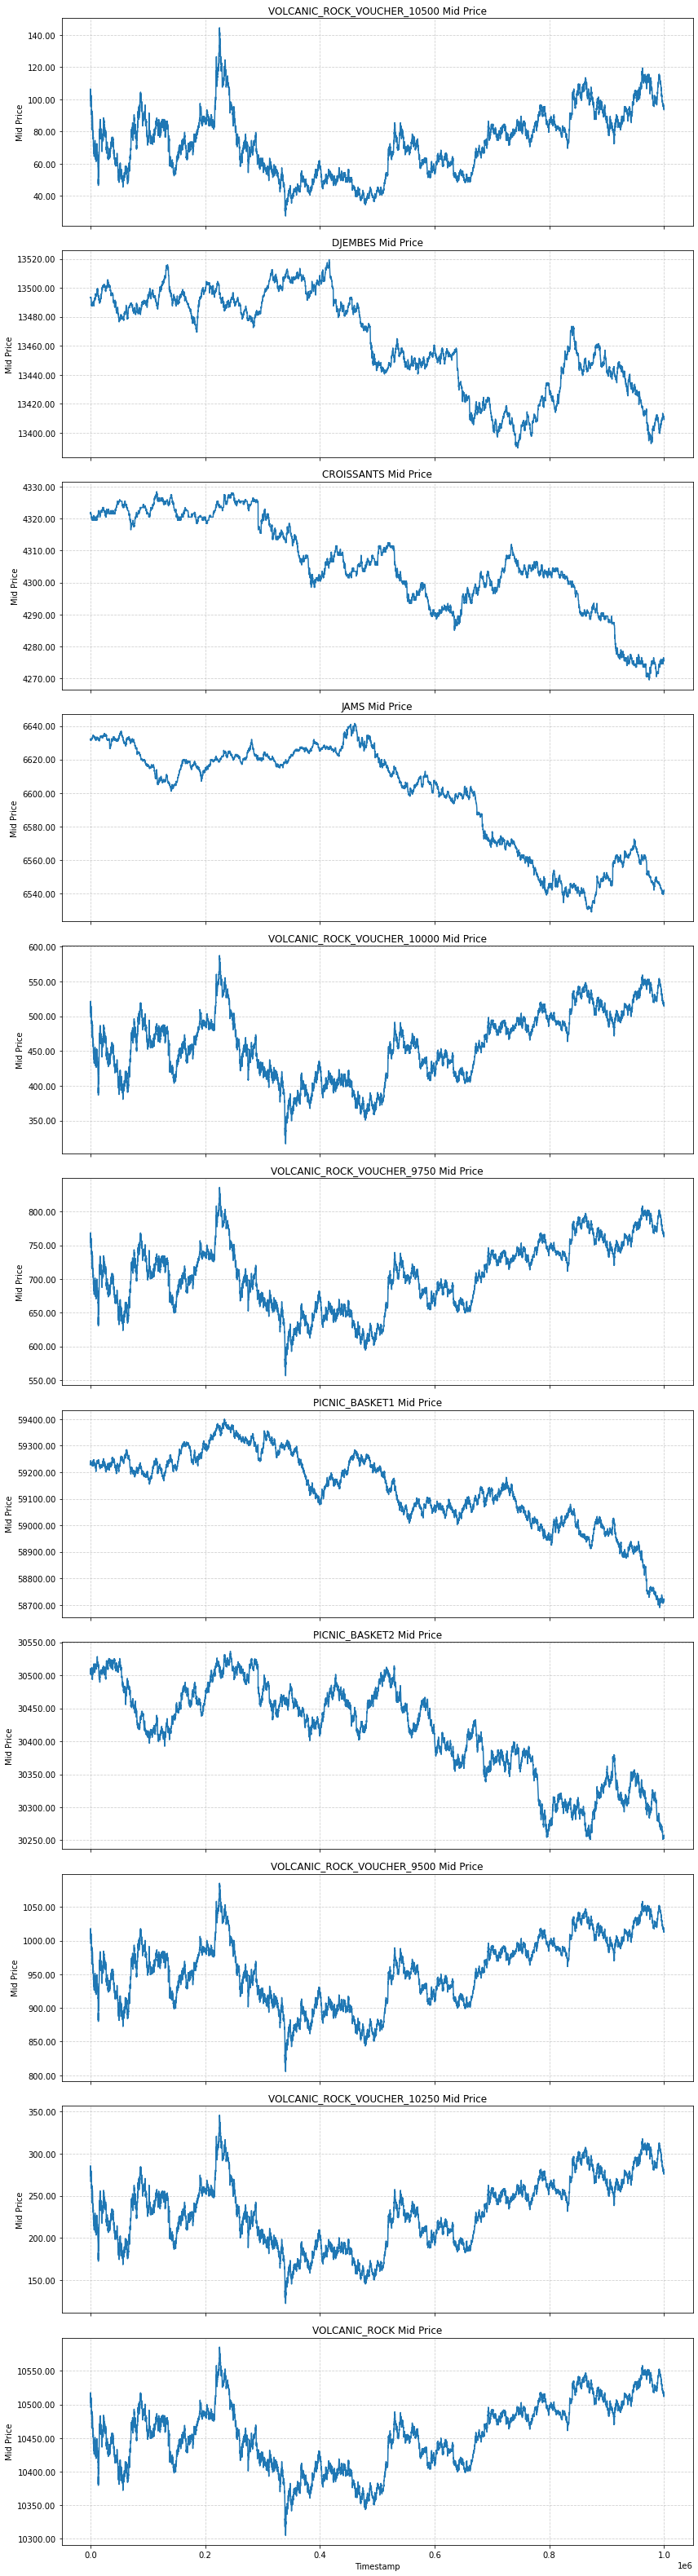

In [24]:
plot_product_mid_prices('data/2025/round3/prices_round_3_day_0.csv')

### Data Round 3 Day 1

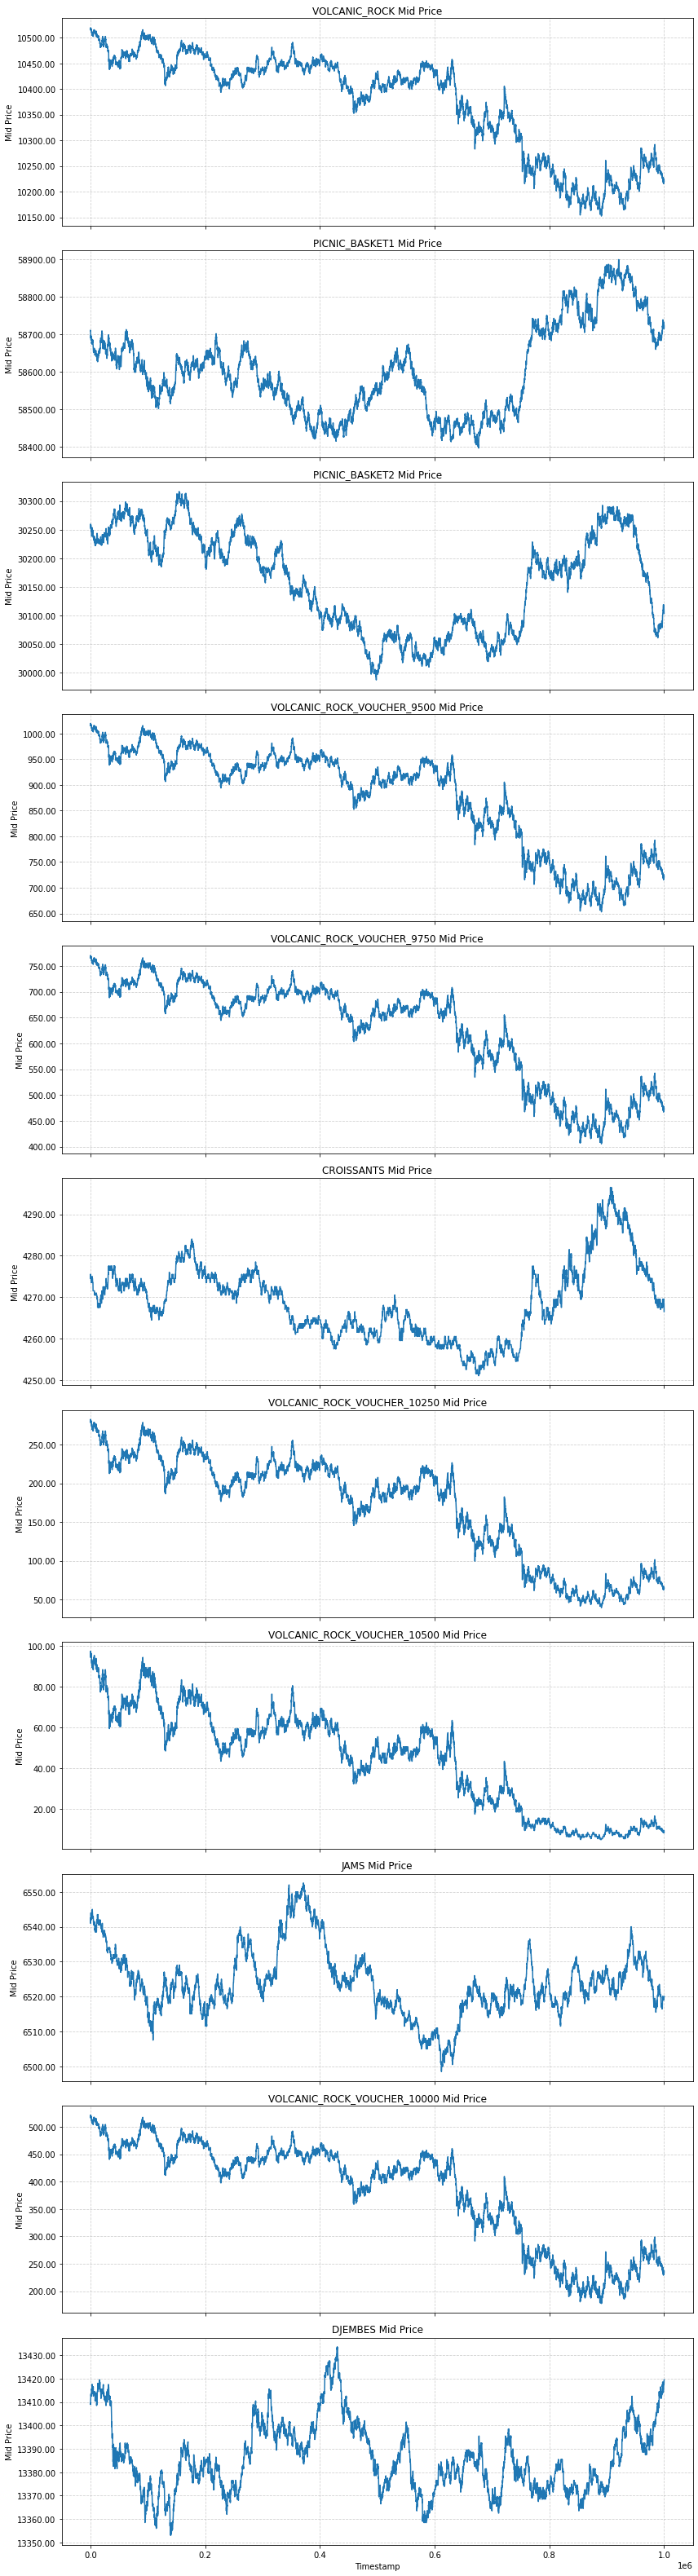

In [25]:
plot_product_mid_prices('data/2025/round3/prices_round_3_day_1.csv')

### Data Round 3 Day 2

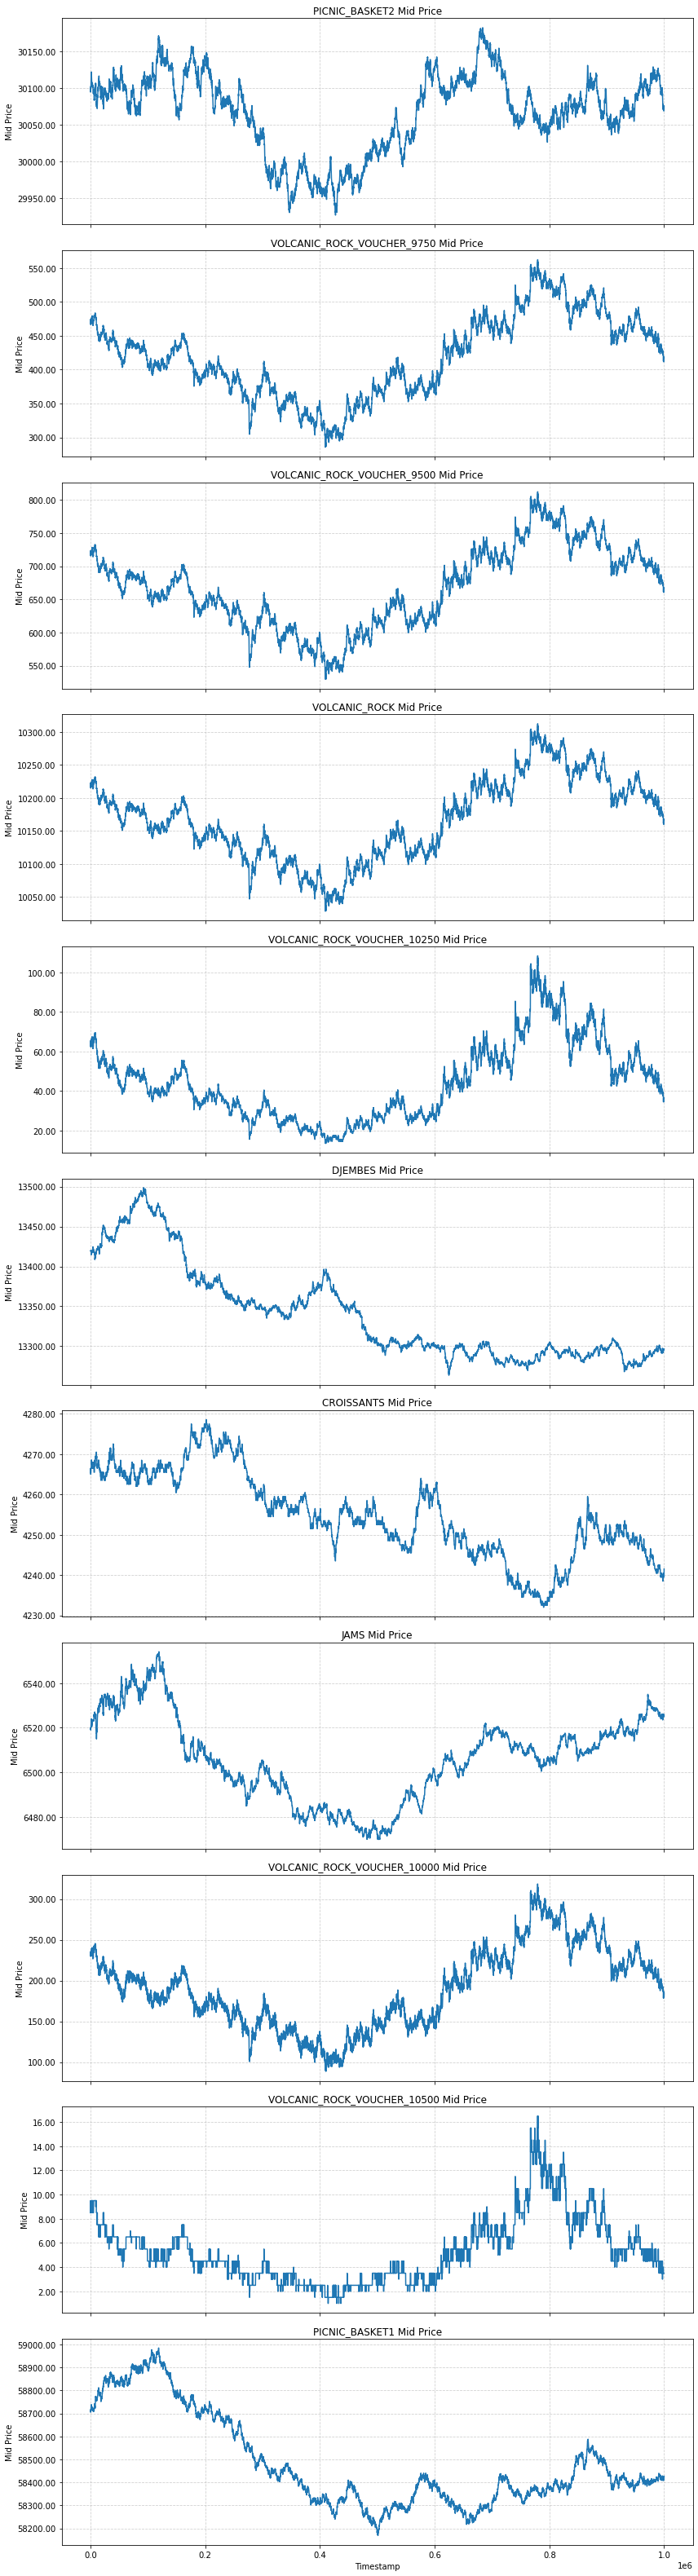

In [26]:
plot_product_mid_prices('data/2025/round3/prices_round_3_day_2.csv')

## Correlation Products 2025

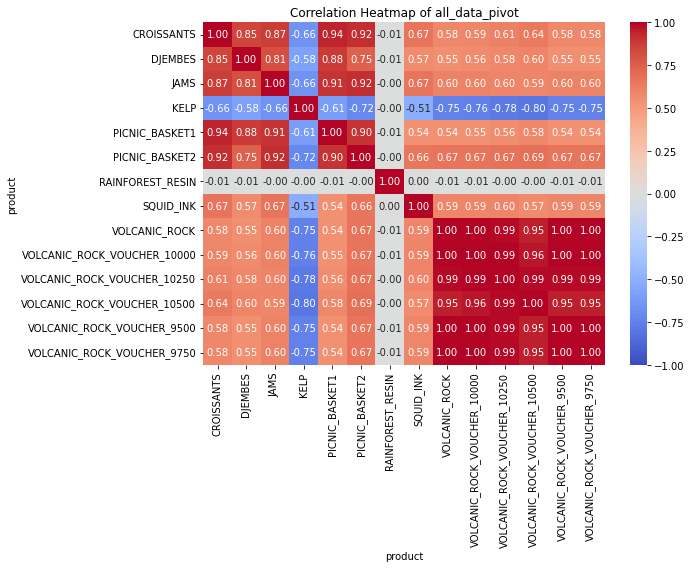

In [34]:
import seaborn as sns

df_day0 = pd.read_csv('data/2025/round3/prices_round_3_day_0.csv', sep=";")
df_day1 = pd.read_csv('data/2025/round3/prices_round_3_day_1.csv', sep=";")
df_day2 = pd.read_csv('data/2025/round3/prices_round_3_day_2.csv', sep=";")
# first merge the three dfs and then do the correlation
df = pd.concat([df_day0, df_day1, df_day2], ignore_index=True)

# Pivot to get products as columns and mid_price as values
pivot = df.pivot_table(index=["day", "timestamp"], columns="product", values="mid_price")

# Compute correlation matrix
corr_matrix = pivot.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of all_data_pivot")
plt.tight_layout()
plt.show()

## VOLCANIC products only

### Day 0 - midprices

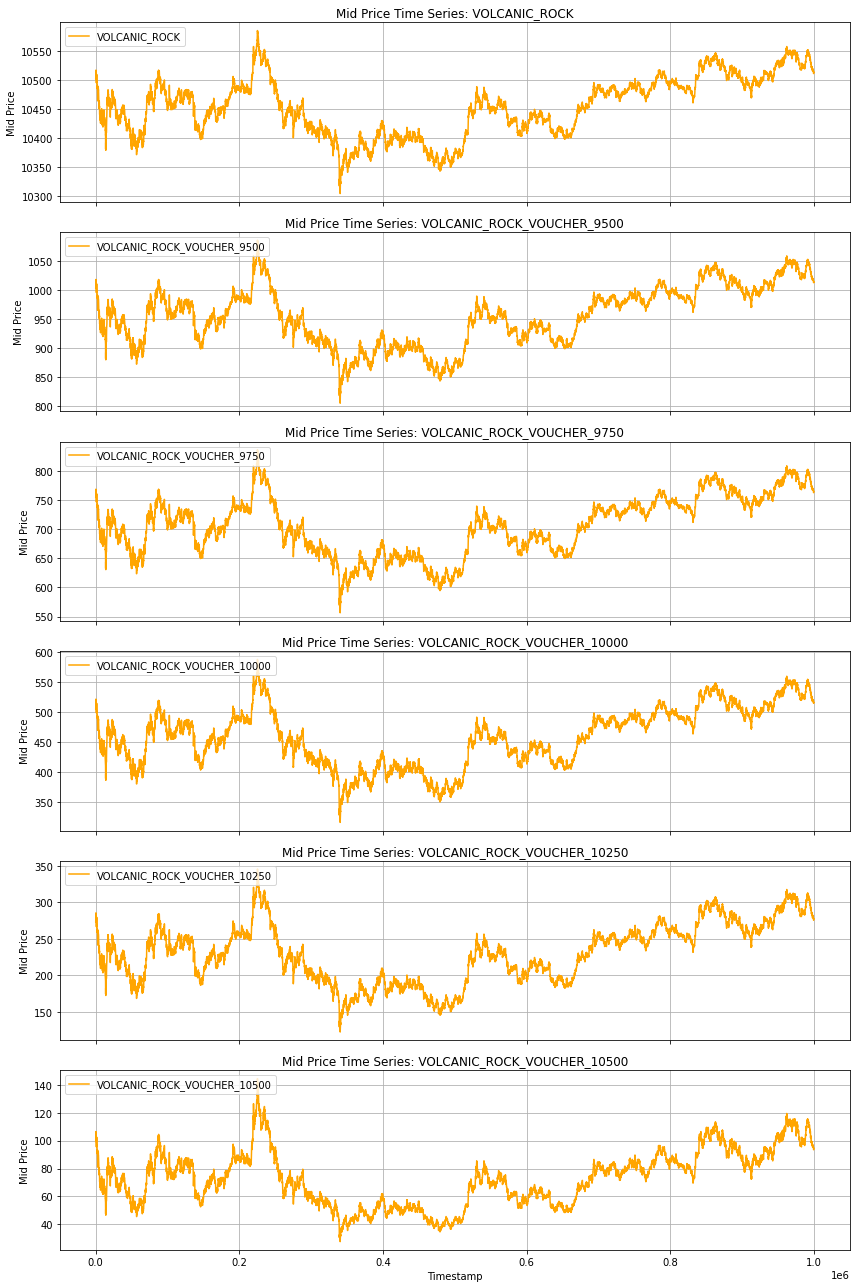

In [28]:
plot_volcanic_products('data/2025/round3/prices_round_3_day_0.csv')

### Day 1 - midprices

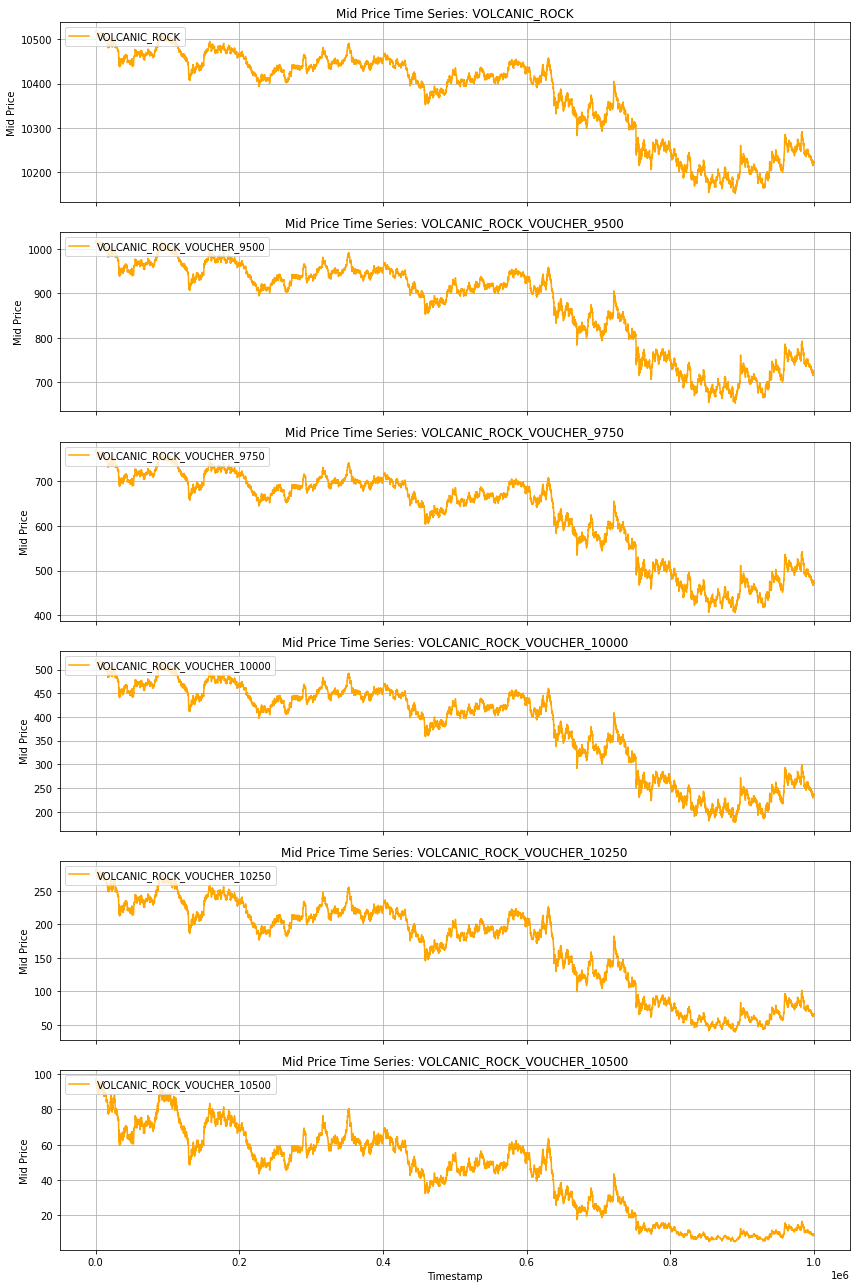

In [29]:
plot_volcanic_products('data/2025/round3/prices_round_3_day_1.csv')

### Day 2 - midprices

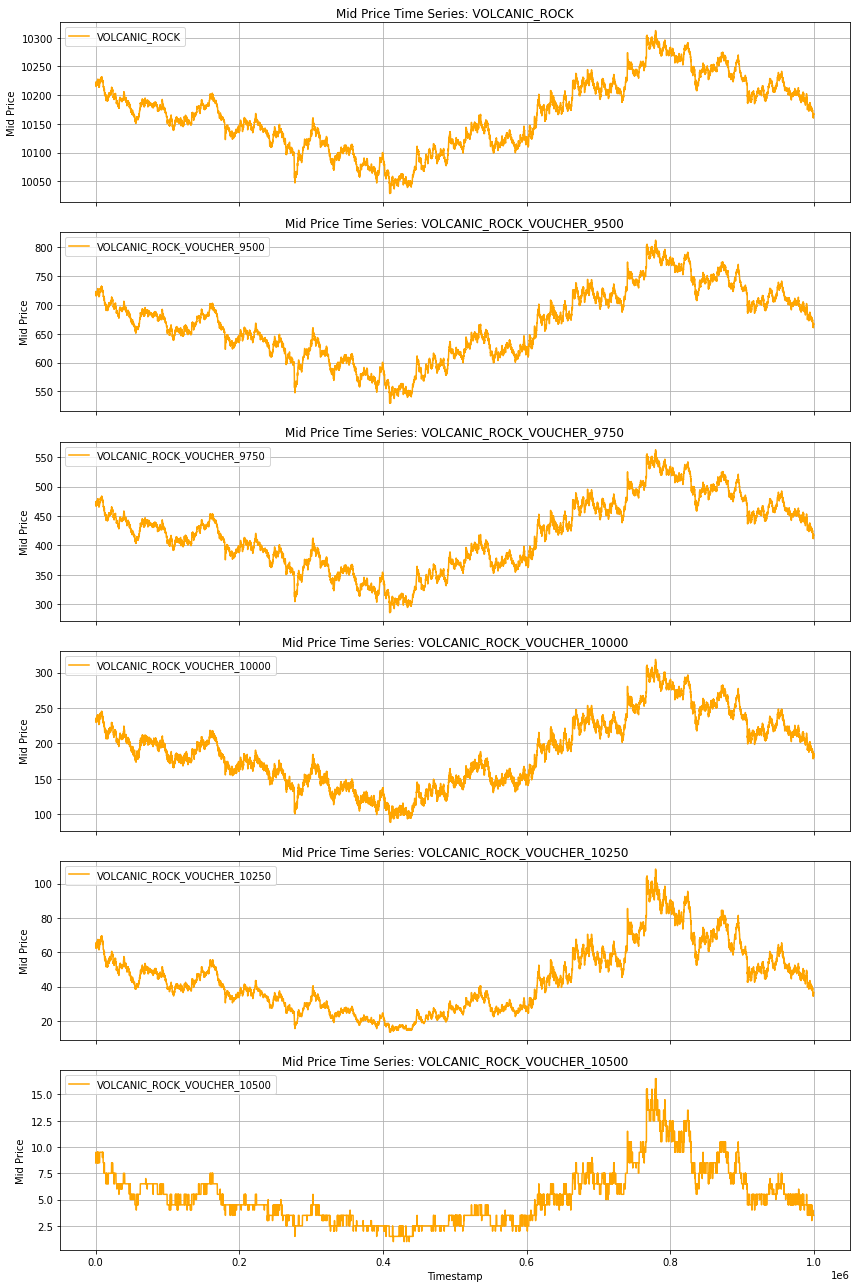

In [30]:
plot_volcanic_products('data/2025/round3/prices_round_3_day_2.csv')

## Extra processing for volcanic products

**Adding intrinsic values, premiums, spreads and z-scores to the dataframes**

In [ ]:
df_day0 = pd.read_csv('data/2025/round3/prices_round_3_day_0.csv', sep=";")
df_day1 = pd.read_csv('data/2025/round3/prices_round_3_day_1.csv', sep=";")
df_day2 = pd.read_csv('data/2025/round3/prices_round_3_day_2.csv', sep=";")

volcanic_products = [
    'VOLCANIC_ROCK',
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500',
]

strike_prices = {
    'VOLCANIC_ROCK_VOUCHER_9500': 9500,
    'VOLCANIC_ROCK_VOUCHER_9750': 9750,
    'VOLCANIC_ROCK_VOUCHER_10000': 10000,
    'VOLCANIC_ROCK_VOUCHER_10250': 10250,
    'VOLCANIC_ROCK_VOUCHER_10500': 10500,
}

def process_volcanic_day(df):
    # Filter only volcanic products
    df = df[df["product"].isin(volcanic_products)].copy()

    # Merge to get volcanic rock mid_price for each timestamp
    rock_prices = df[df["product"] == "VOLCANIC_ROCK"][["day", "timestamp", "mid_price"]].rename(columns={"mid_price": "rock_mid"})
    
    enriched_dfs = []

    for voucher, strike in strike_prices.items():
        df_voucher = df[df["product"] == voucher].copy()

        # Merge rock mid price into voucher df
        df_voucher = df_voucher.merge(rock_prices, on=["day", "timestamp"], how="left")

        # Calculate intrinsic value and premium
        df_voucher["intrinsic_value"] = (df_voucher["rock_mid"] - strike).clip(lower=0)
        df_voucher["premium"] = df_voucher["mid_price"] - df_voucher["intrinsic_value"]

        # Calculate spread and z-score
        # Spread, i,e. diff between midrpice of the rock and the voucher
        df_voucher["spread"] = df_voucher["rock_mid"] - df_voucher["mid_price"] - strike
        df_voucher["spread_mean"] = df_voucher["spread"].rolling(window=100).mean()
        df_voucher["spread_std"] = df_voucher["spread"].rolling(window=100).std()
        df_voucher["z_score"] = (df_voucher["spread"] - df_voucher["spread_mean"]) / df_voucher["spread_std"]

        enriched_dfs.append(df_voucher)

    # Combine all vouchers + rock
    final_df = pd.concat(enriched_dfs + [df[df["product"] == "VOLCANIC_ROCK"]], ignore_index=True)
    return final_df


df_day0_enriched = process_volcanic_day(df_day0)
df_day1_enriched = process_volcanic_day(df_day1)
df_day2_enriched = process_volcanic_day(df_day2)

## Plotting intrinsic values + mid prices Day 0, Day 1, Day 2

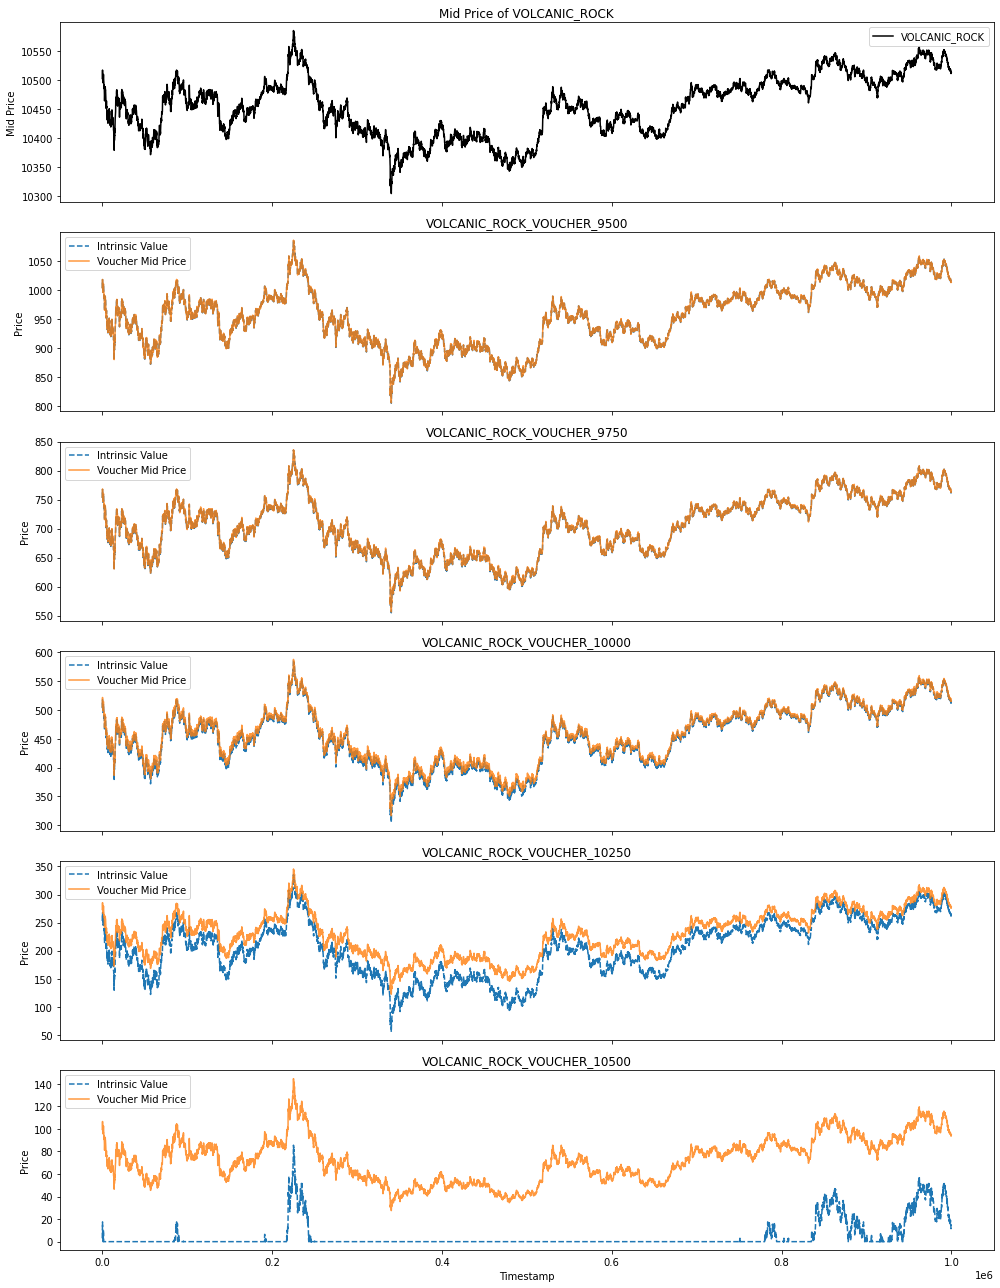

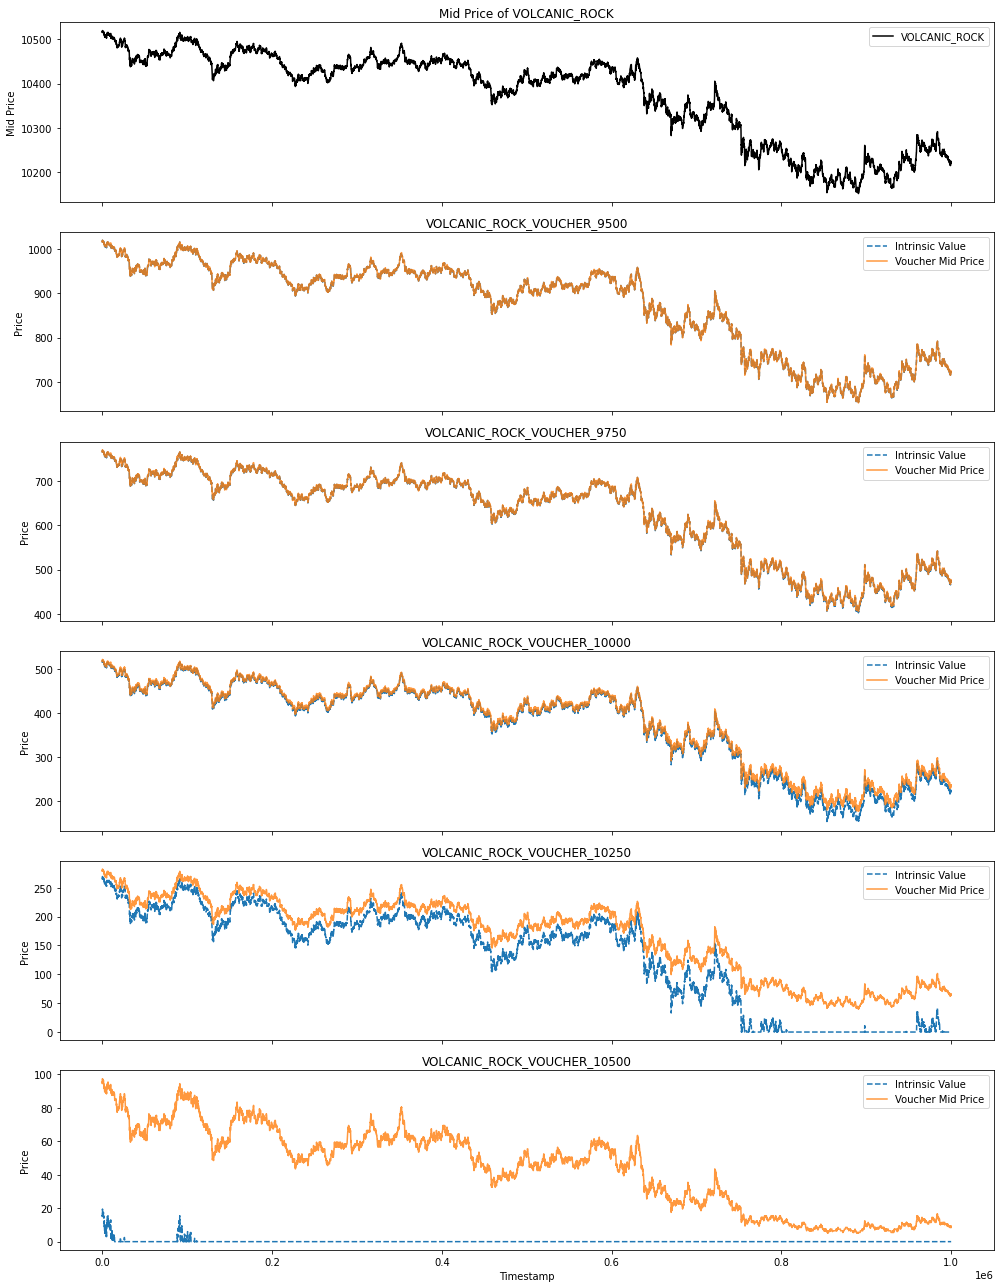

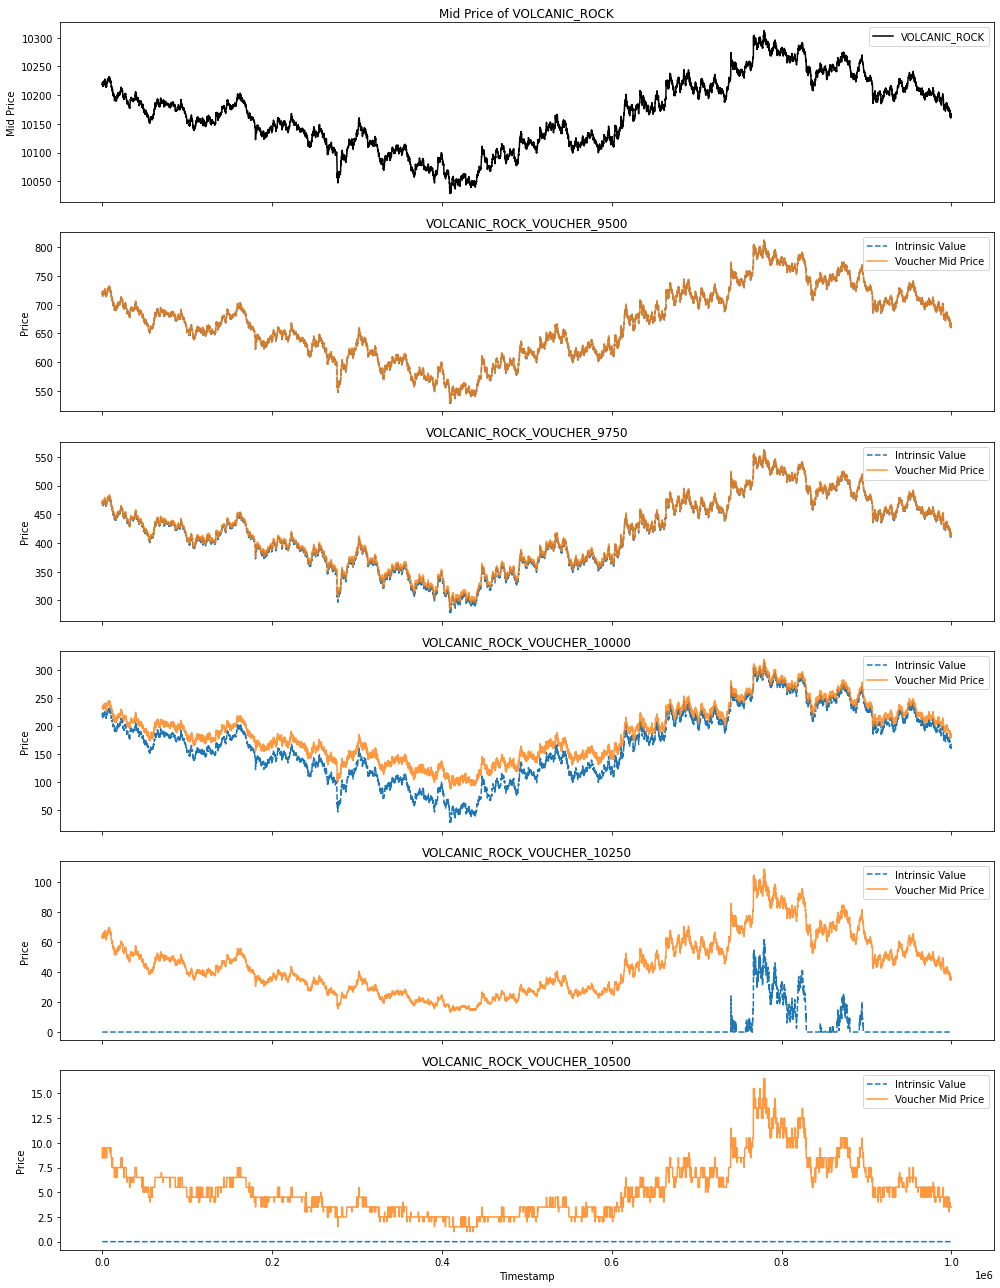

In [46]:
plot_rock_and_intrinsic_values(df_day0_enriched, voucher_names)
plot_rock_and_intrinsic_values(df_day1_enriched, voucher_names)
plot_rock_and_intrinsic_values(df_day2_enriched, voucher_names)

## Plotting Premiums Day 0, Day 1, Day 2

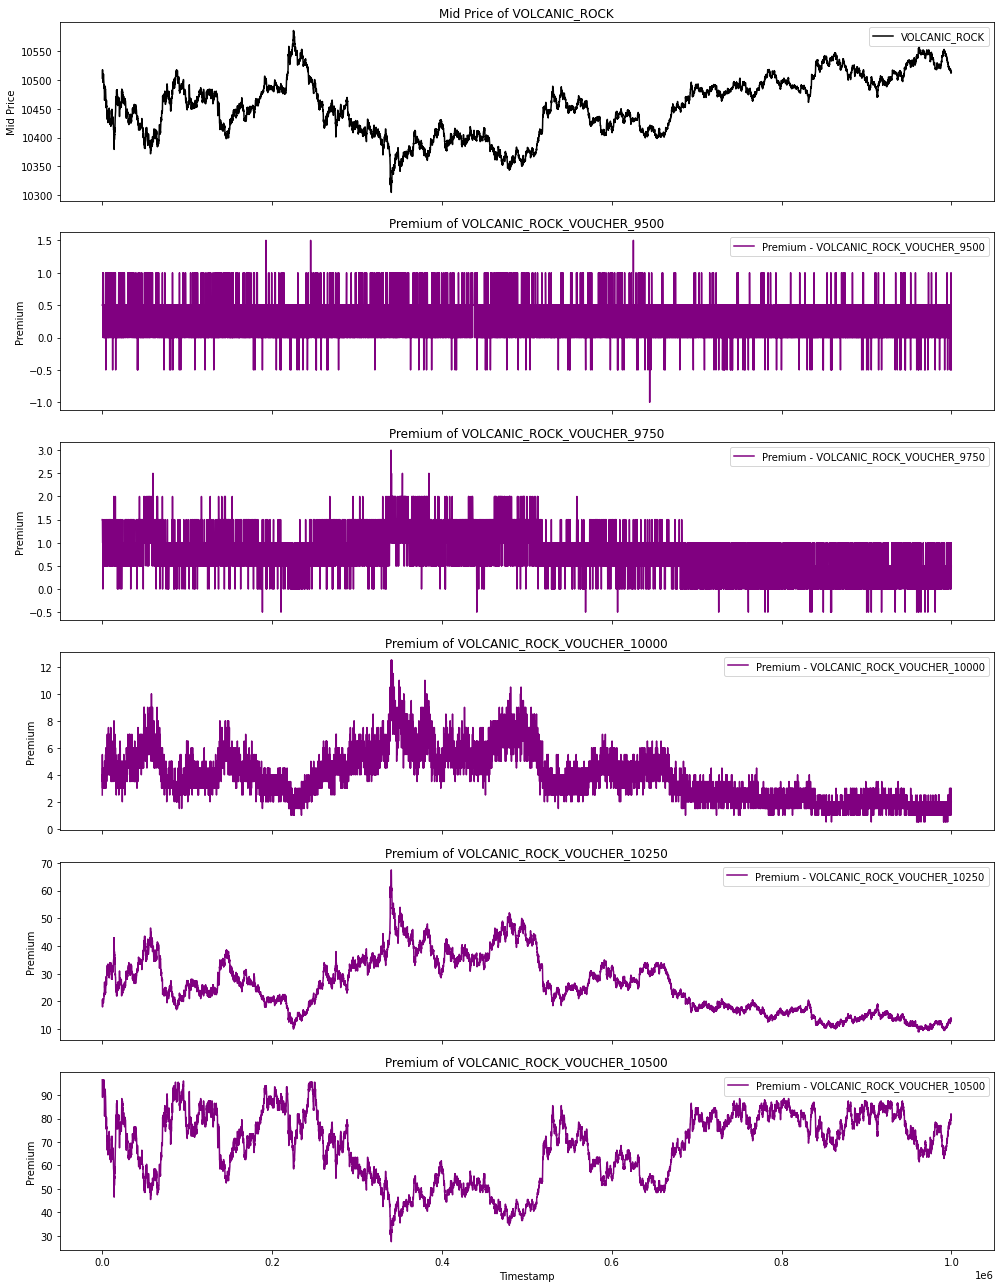

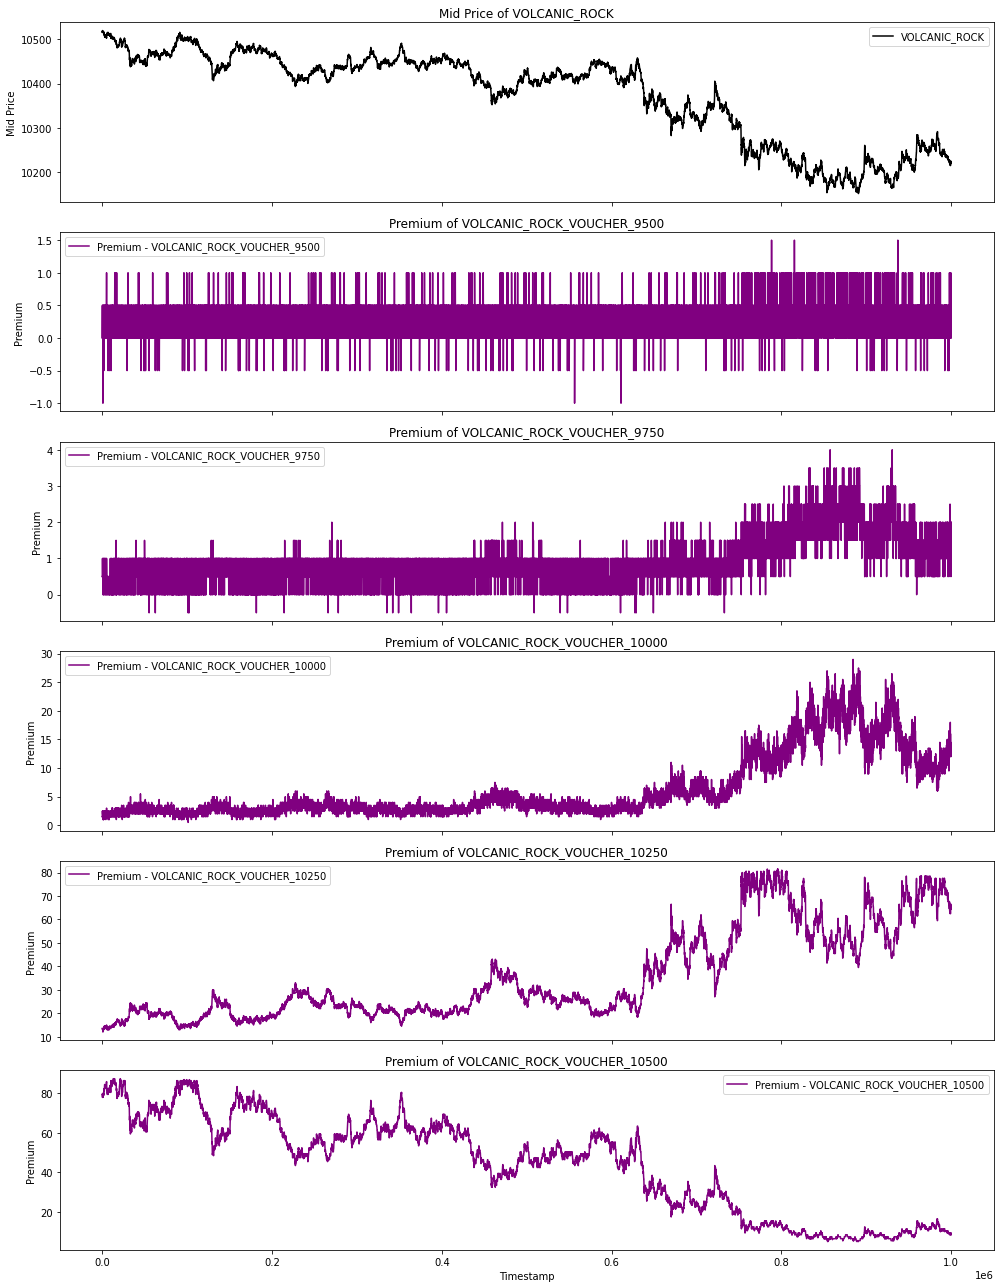

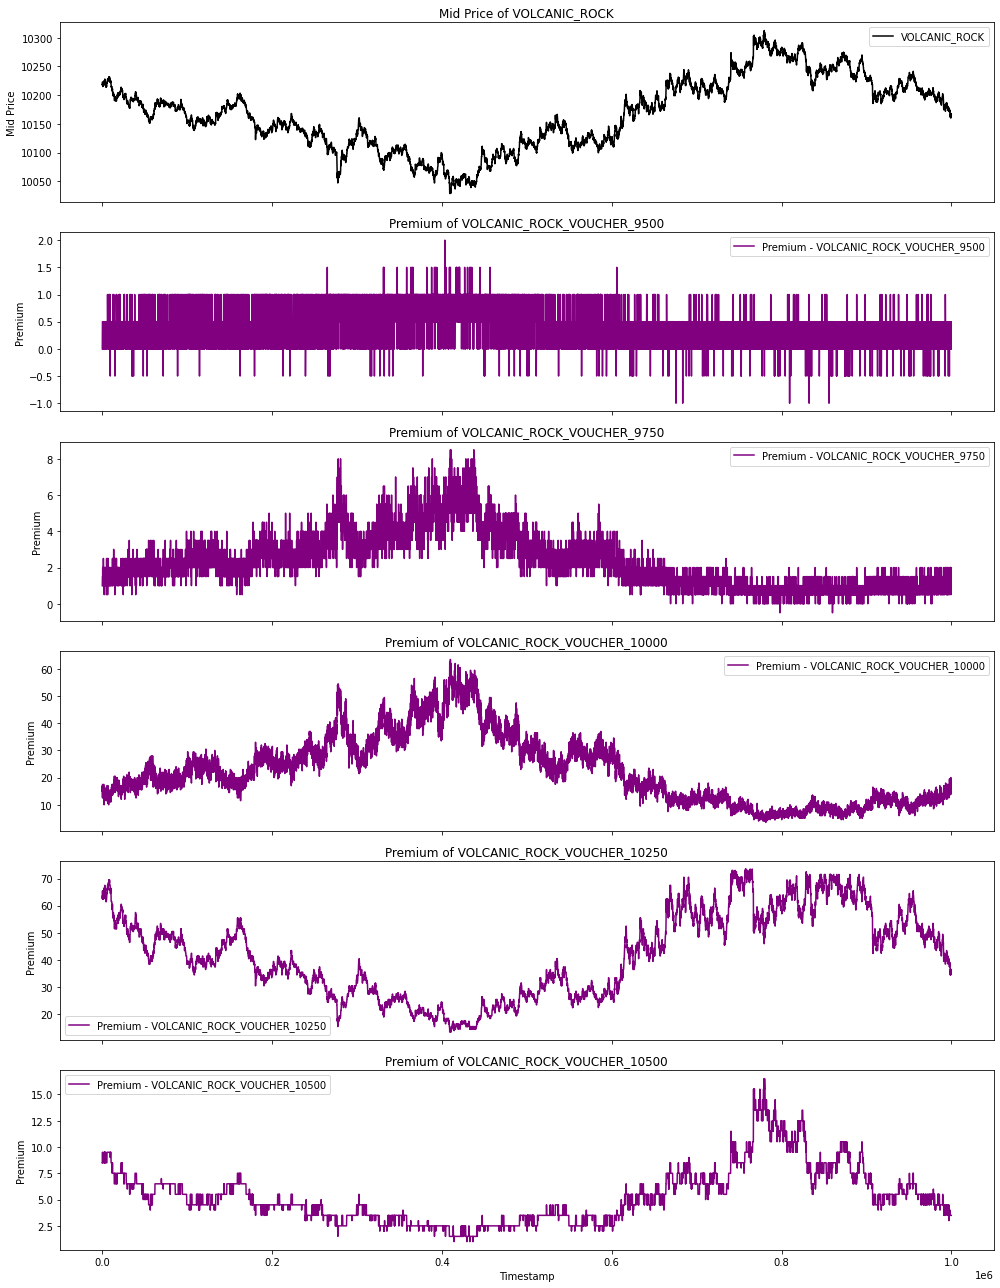

In [45]:
plot_rock_and_premiums(df_day0_enriched, voucher_names)
plot_rock_and_premiums(df_day1_enriched, voucher_names)
plot_rock_and_premiums(df_day2_enriched, voucher_names)

## Z-Scores Day 0, Day 1, Day 2
Z-scores for mean-reversion:  
	•	If z-score > +2: consider selling the voucher  
	•	If z-score < -2: consider buying the voucher  
	•	If z-score crosses back toward 0: exit position  
Tbh not sure how useful this really is in the context of 'options'/vouchers but some people in Discord mentioned z-score so might as well calculate it here

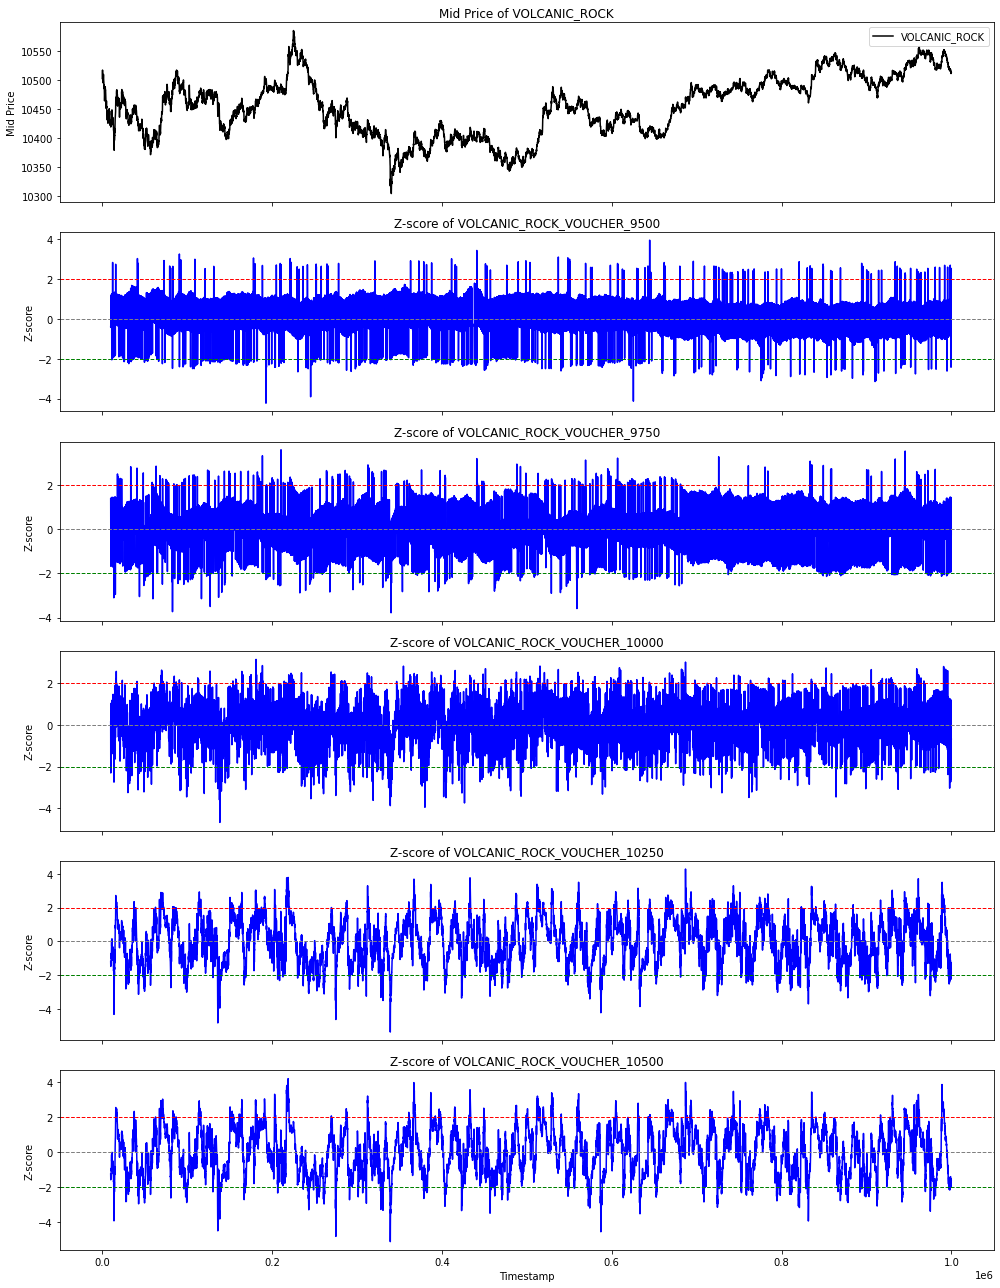

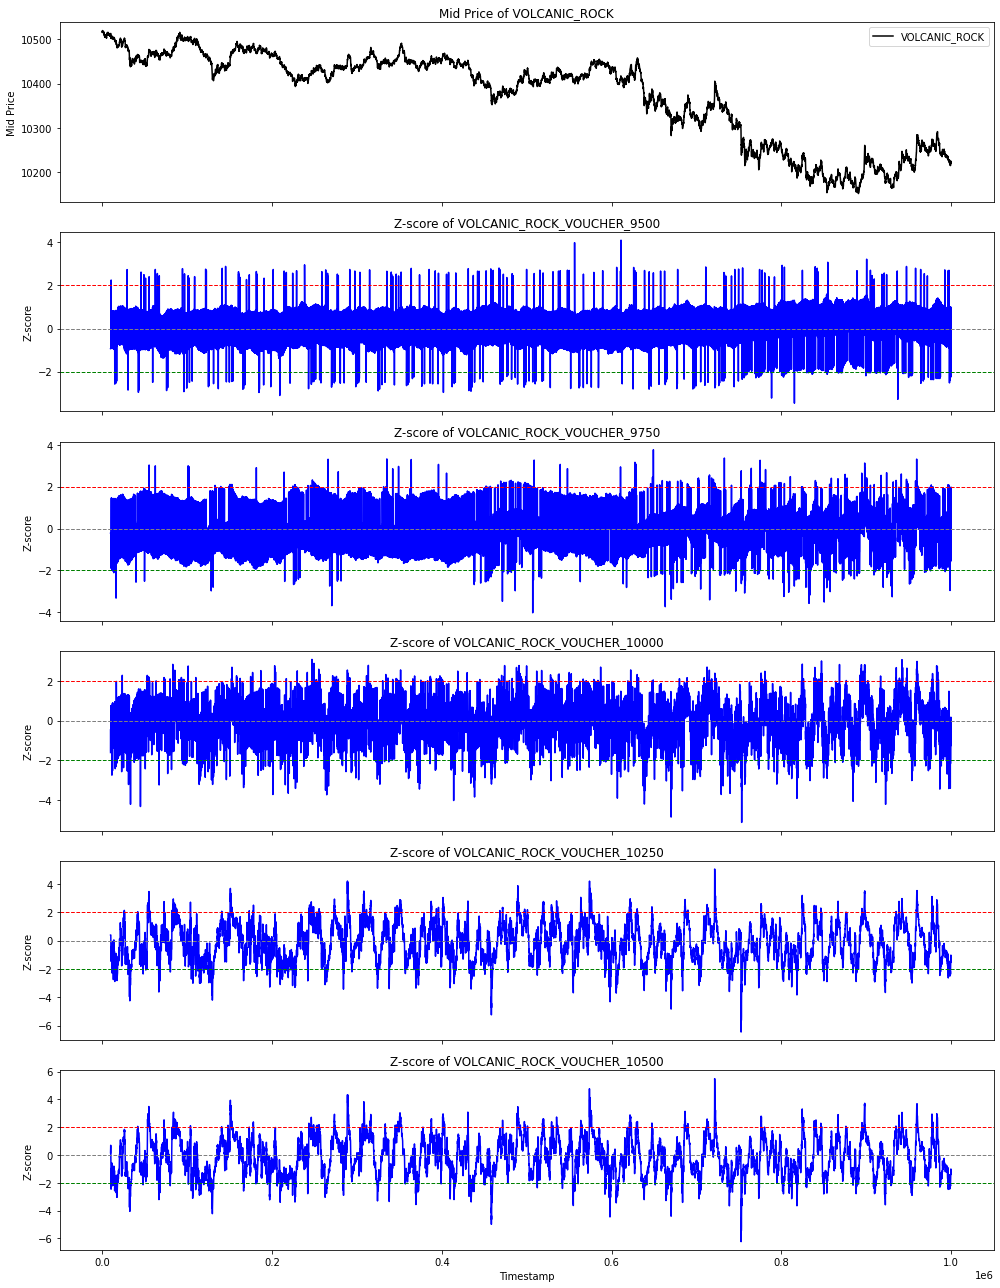

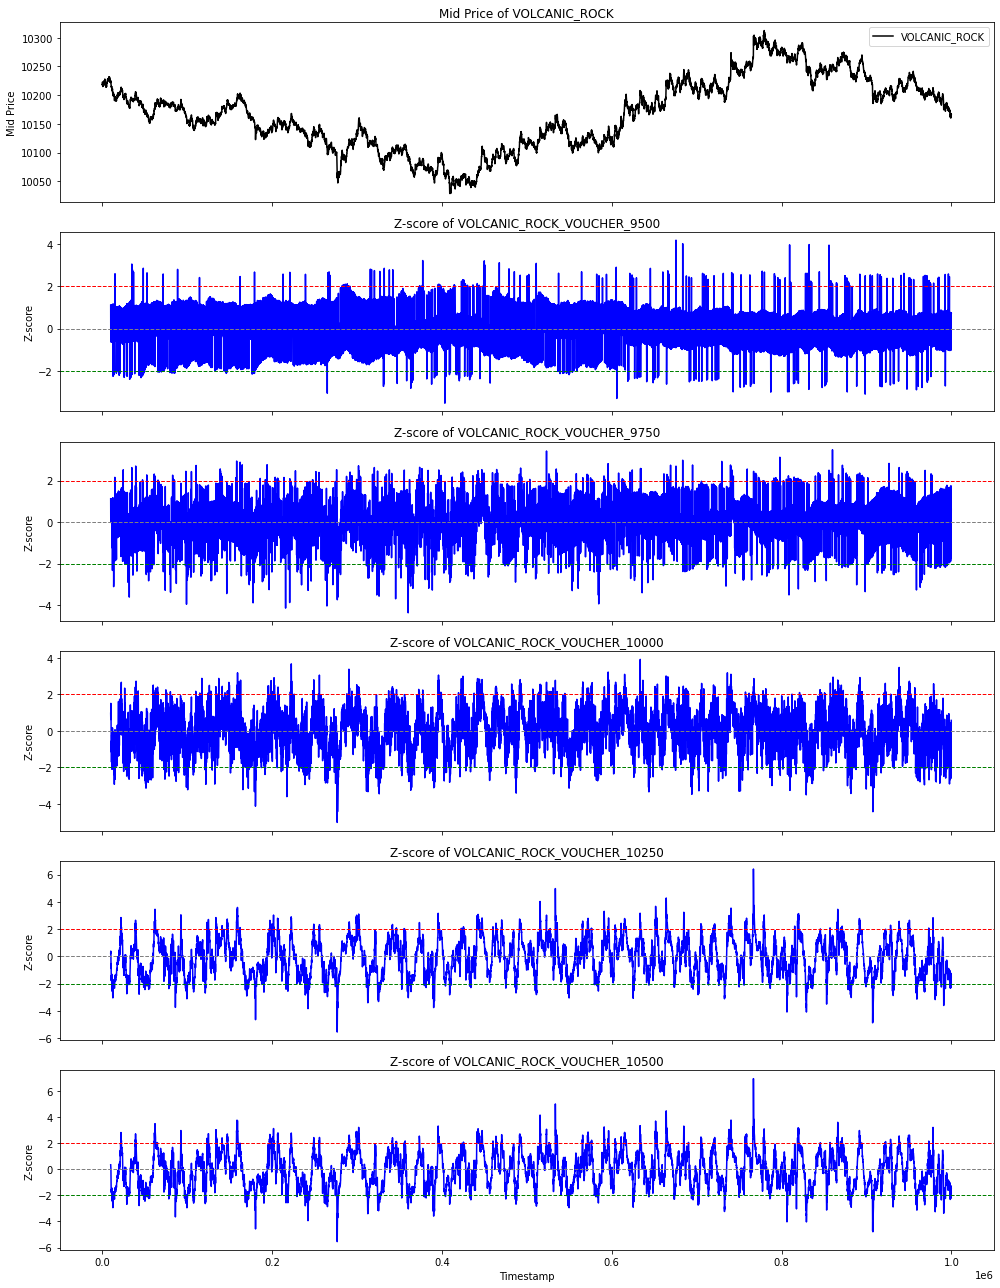

In [51]:
plot_rock_and_zscores(df_day0_enriched, voucher_names)
plot_rock_and_zscores(df_day1_enriched, voucher_names)
plot_rock_and_zscores(df_day2_enriched, voucher_names)

## Correlations 2023 (round4), 2025


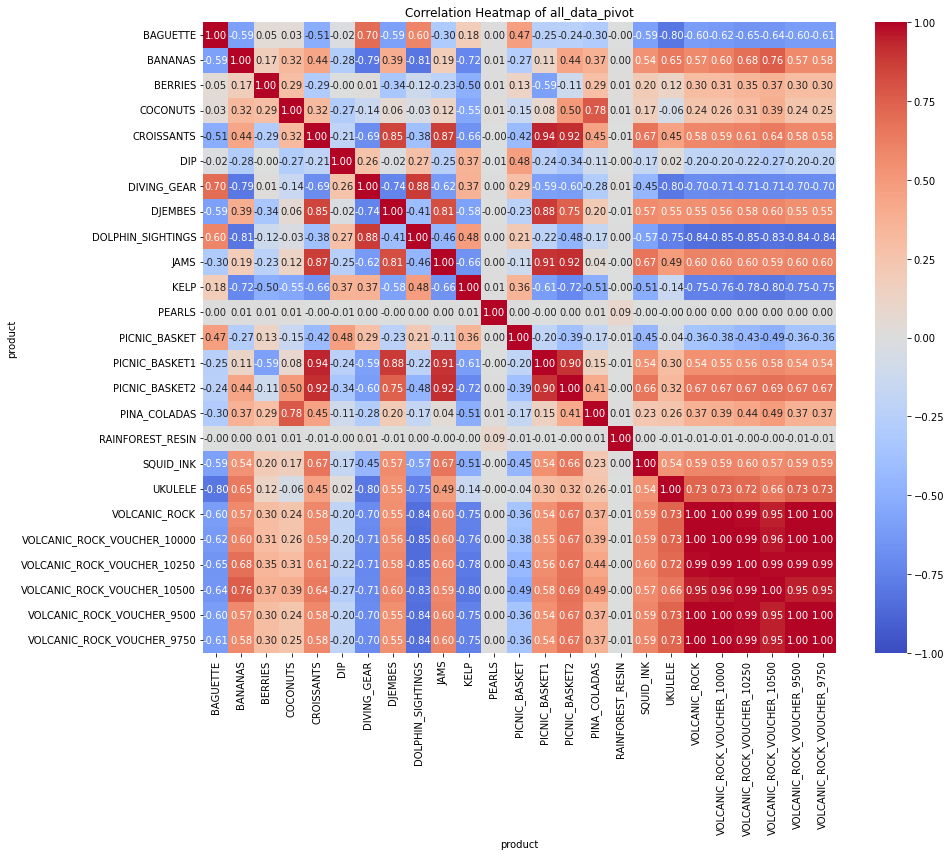

In [ ]:
df1 = pd.read_csv('data/2025/round3/prices_round_3_day_0.csv', sep=";")
df2 = pd.read_csv('data/2025/round3/prices_round_3_day_1.csv', sep=";")
df3 = pd.read_csv('data/2025/round3/prices_round_3_day_2.csv', sep=";")
df4 = pd.read_csv('data/2023/island-data-bottle-round-4/prices_round_4_day_1.csv', sep=";")
df5 = pd.read_csv('data/2023/island-data-bottle-round-4/prices_round_4_day_2.csv', sep=";")
df6 = pd.read_csv('data/2023/island-data-bottle-round-4/prices_round_4_day_3.csv', sep=";")
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

pivot = df.pivot_table(index=["day", "timestamp"], columns="product", values="mid_price")
corr_matrix = pivot.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of all_data_pivot")
plt.tight_layout()
plt.show()

## Correlations 2024 (round3), 2025

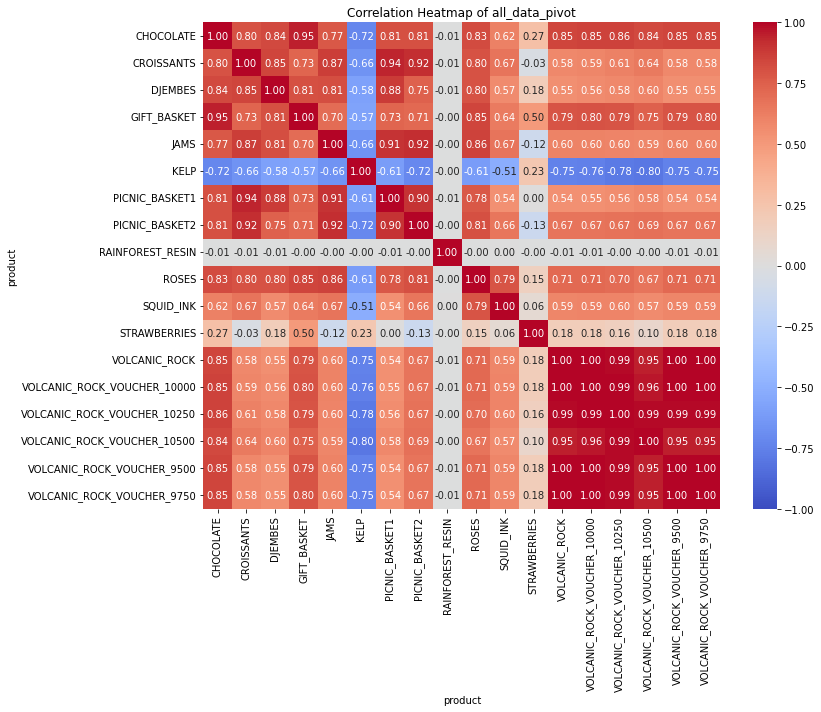

In [ ]:
df1 = pd.read_csv('data/2025/round3/prices_round_3_day_0.csv', sep=";")
df2 = pd.read_csv('data/2025/round3/prices_round_3_day_1.csv', sep=";")
df3 = pd.read_csv('data/2025/round3/prices_round_3_day_2.csv', sep=";")
df7 = pd.read_csv('data/2024/round-3/prices_round_3_day_0.csv', sep=";")
df8 = pd.read_csv('data/2024/round-3/prices_round_3_day_1.csv', sep=";")
df9 = pd.read_csv('data/2024/round-3/prices_round_3_day_2.csv', sep=";")


df = pd.concat([df1, df2, df3, df7, df8, df9], ignore_index=True)

pivot = df.pivot_table(index=["day", "timestamp"], columns="product", values="mid_price")
corr_matrix = pivot.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of all_data_pivot")
plt.tight_layout()
plt.show()

I added the correlations above because I was curious to see which new and old products are highly correlated. Peeps in Discord keep saying how data is reused (and how the top 5 hardcoded their whole strat lmao) but anyway maybe it's best to ignore this and focus on the volcanic vouchers? 

Maybe we can try to come up with a strat for JAMS CROISSANTS and DJEMBES, since our round 2 algo did not trade those. Some users say they did pair trading with the 3 products, maybe something we could look into if there is time???